<a href="https://colab.research.google.com/github/SatChittAnand/Certificate-Extractor/blob/main/certificate_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [ ]:
!pip install pytesseract

In [ ]:
!pip install pdf2image

In [ ]:
!pip install pytesseract pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.1 MB/s eta 0:00:00


In [ ]:
!apt install tesseract-ocr -y
!pip install pytesseract opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 57.7 MB/s eta 0:00:00


**Handling Image files.**

In [ ]:
import cv2
import pytesseract
import re

def extract_fields_only(file_path):
    image = cv2.imread(file_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 3)
    text = pytesseract.image_to_string(gray)

    # Detect document type by keywords
    is_marksheet = bool(re.search(r"(Grade Sheet|Mark Sheet)", text, re.IGNORECASE))

    if is_marksheet:
        # Only marksheet fields
        result = {}
        patterns = {
            "name": r"(Name|Student Name)\s*:?\.?\s*([A-Za-z ]+)",
            "registration_no": r"(Regd Number|Registration No|Registration Number)\s*:?\.?\s*([A-Za-z0-9]+)",
            "serial_no": r"(Serial No|Sl\. No)\s*:?\.?\s*([A-Za-z0-9]+)",
            "issued_by": r"(Issued By)\s*:?\.?\s*([A-Za-z0-9 &]+)"
        }
        for key, pattern in patterns.items():
            match = re.search(pattern, text, re.IGNORECASE)
            result[key] = match.group(2).strip() if match else None
        return result
    else:
        # Only certificate fields
        result = {}
        patterns = {
            "name": r"Student Name\s*:?\.?\s*([A-Za-z ]+)",
            "certificate_name": r"Certificate Of\s*:?\.?\s*([A-Za-z0-9 ]+)",
            "serial_no": r"Serial No\s*:?\.?\s*([A-Za-z0-9]+)",
            "issued_by": r"IssuedBy\s*:?\.?\s*([A-Za-z0-9 ]+)",
            "registration_no": r"Registration No\s*:?\.?\s*([A-Za-z0-9]+)"
        }
        for key, pattern in patterns.items():
            match = re.search(pattern, text, re.IGNORECASE)
            result[key] = match.group(1).strip() if match else None
        return result

# Example usage: returns CLEAN DICTIONARY of only required fields
for fname in ["Mark Sheet.png", "priyas.png"]:
    fields = extract_fields_only(fname)
    print(f"{fname}: {fields}")


Mark Sheet.png: {'name': 'Aditya Prasad Sahu', 'registration_no': '2241019166', 'serial_no': '7728927627872', 'issued_by': 'SOA University Semester'}
priyas.png: {'name': 'Priya Sharma', 'certificate_name': 'AWS', 'serial_no': '112233', 'issued_by': 'AIC', 'registration_no': '2341987362'}


In [ ]:
import cv2
import pytesseract
import re

def extract_text(image_path):
    """OCR text extraction"""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text

def extract_fields(text):
    """Extract Name, Registration No, Serial, Certificate Name, Issued By"""
    fields = {
        "Name": None,
        "Registration_Number": None,
        "Serial": None,
        "Certificate_Name": None,
        "Issued_By": None
    }

    # Registration number (10 digits)
    reg_match = re.search(r"\b\d{10}\b", text)
    if reg_match:
        fields["Registration_Number"] = reg_match.group(0)

    # Serial number
    serial_match = re.search(r"(?:Serial No|Certificate No)[:\s]*([A-Za-z0-9]+)", text, re.IGNORECASE)
    if serial_match:
        fields["Serial"] = serial_match.group(1)

    # Name
    name_match = re.search(r"(?:Student Name|Full Name)[:\s]*([A-Za-z ]+)", text, re.IGNORECASE)
    if name_match:
        fields["Name"] = name_match.group(1).strip()

    # Certificate Name
    cert_match = re.search(r"(?:Certificate Name|Course Name)[:\s]*([A-Za-z ]+)", text, re.IGNORECASE)
    if cert_match:
        fields["Certificate_Name"] = cert_match.group(1).strip()

    # Issued By
    issued_match = re.search(r"(?:IssuedBy|Authorized By|Provided By)[:\s]*([A-Za-z ]+)", text, re.IGNORECASE)
    if issued_match:
        fields["Issued_By"] = issued_match.group(1).strip()

    return fields

def process_certificate(image_path):
    text = extract_text(image_path)
    fields = extract_fields(text)
    return fields

# 🔹 Run on uploaded certificate
image_path = "wwdas.png"
result = process_certificate(image_path)
print("✅ Extracted Fields:", result)


✅ Extracted Fields: {'Name': 'ww DAS', 'Registration_Number': '2341987622', 'Serial': '334524', 'Certificate_Name': 'AIML', 'Issued_By': 'CDH'}


**Handling PDF files**

In [ ]:
import cv2
import pytesseract
import pdfplumber
import re
import requests
import os

def extract_certificate_fields(file_path):
    # Support PDFs and images
    text = ""
    if file_path.lower().endswith('.pdf'):
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
    else:
        image = cv2.imread(file_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.medianBlur(gray, 3)
        text = pytesseract.image_to_string(gray)

    # Patterns for dynamic extraction (robust to noise/position)
    patterns = {
        "serial_no": r"Serial No\.?:\s*([A-Za-z0-9]+)",
        "registration_no": r"Registration No\.?:\s*([A-Za-z0-9]+)",
        "certificate_name": r"Certificate Of:\s*([A-Za-z0-9 ]+)",
        "issued_by": r"IssuedBy:\s*([A-Za-z0-9 ]+)"
    }

    results = {}
    for field, pattern in patterns.items():
        match = re.search(pattern, text)
        results[field] = match.group(1).strip() if match else None

    # Extract name separately due to complex logic
    name_match = re.search(r"Student Name:\s*([A-Za-z ]+)", text)
    name_val = name_match.group(1).strip() if name_match else None

    # If there is a newline or another label, keep only the first part
    if name_val and '\n' in name_val:
        name_val = name_val.split('\n')[0].strip()

    results["name"] = name_val

    # Normalize serial_no as integer (else None)
    try:
        results['serial_no'] = int(results['serial_no']) if results['serial_no'] else None
    except Exception:
        results['serial_no'] = None

    return results

def verify_certificate(fields):
    # Change URL to your backend endpoint
    url = 'https://your-backend/verify_certificate'
    response = requests.post(url, json=fields)
    return response.json() if response.ok else {'error': response.text}

# Main automation function for UI/API integration
def automated_certificate_workflow(file_path):
    fields = extract_certificate_fields(file_path)
    print("Extracted Fields:", fields)
    # verification_results = verify_certificate(fields)
    # print("Verification Results:", verification_results)
    # return verification_results

# ==== Usage Example ====
# User Upload (via API, UI, CLI etc.)
filepath = "priyas.png"  # Replace with actual upload logic

if os.path.exists(filepath):
    automated_certificate_workflow(filepath)
else:
    print(f"File not found: {filepath}")

Extracted Fields: {'serial_no': 112233, 'registration_no': '2341987362', 'certificate_name': 'AWS', 'issued_by': 'AIC', 'name': 'Priya Sharma'}


**LOGO Detection**

In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 7.0 MB/s eta 0:00:00


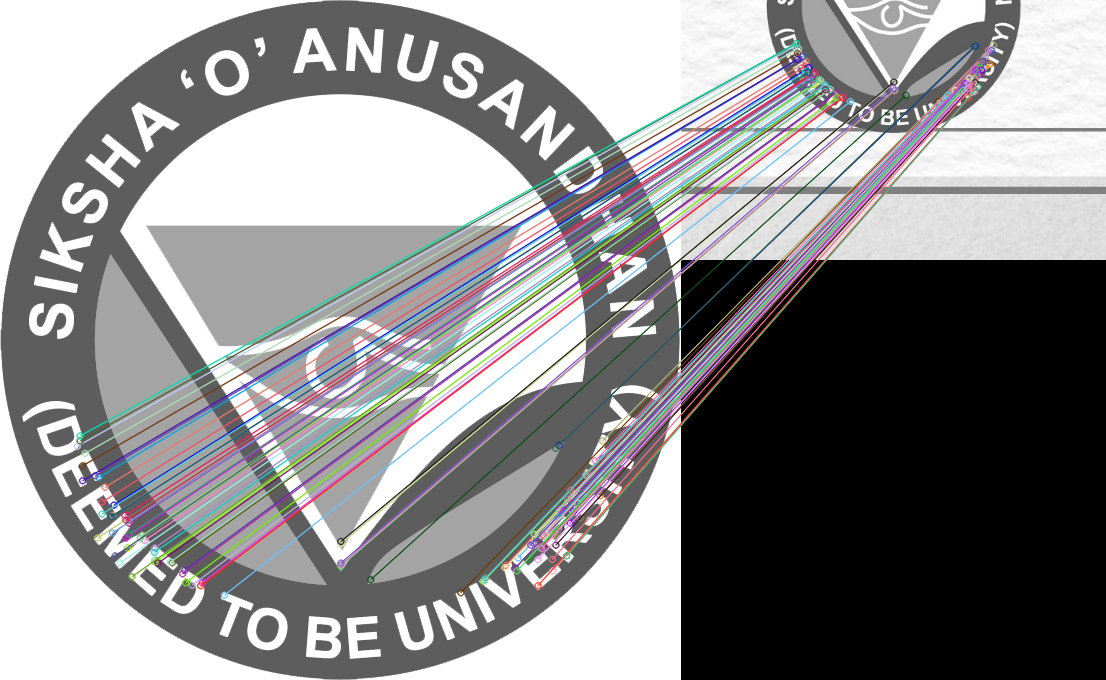

Logo detected by ORB feature matching.
RESULT: YES, logo present!


In [ ]:
import cv2
import numpy as np
from PIL import Image
import imagehash
from google.colab.patches import cv2_imshow

def load_grayscale(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception(f"Failed to load image: {path}")
    return img

def crop_certificate_logo(cert_img, y_ratio=0.85, h_ratio=0.13, x_ratio=0.35, w_ratio=0.3):
    # Crops a region (default: bottom center for logo seal)
    h, w = cert_img.shape
    y_start, y_end = int(h*y_ratio), int(h*(y_ratio+h_ratio))
    x_start, x_end = int(w*x_ratio), int(w*(x_ratio+w_ratio))
    cropped = cert_img[y_start:y_end, x_start:x_end]
    return cropped

def orb_match(logo, candidate, min_match_count=8, ratio_thresh=0.85, draw=False):
    orb = cv2.ORB_create(nfeatures=2000)
    kp1, des1 = orb.detectAndCompute(logo, None)
    kp2, des2 = orb.detectAndCompute(candidate, None)
    if des1 is None or des2 is None:
        return False

    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in matches if m.distance < ratio_thresh * n.distance]
    if len(good) < min_match_count:
        return False

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if M is not None and mask is not None:
        inliers = sum(mask.ravel().tolist())
        if inliers > max(6, 0.6*min_match_count):
            if draw:
                result = cv2.drawMatches(logo, kp1, candidate, kp2, good, None,
                                        matchesMask=mask.ravel().tolist(),
                                        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                cv2_imshow(result)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            return True
    return False

def template_match(logo, candidate, threshold=0.8):
    # Resize logo to fit in cropped area if necessary
    if candidate.shape[0] < logo.shape[0] or candidate.shape[1] < logo.shape[1]:
        logo = cv2.resize(logo, (candidate.shape[1], candidate.shape[0]))
    res = cv2.matchTemplate(candidate, logo, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    return max_val >= threshold

def phash_compare(logo_path, crop_img, hash_threshold=12):
    # Use PIL images for phash
    logo_img = Image.open(logo_path).convert('L').resize((128,128))
    crop_pil = Image.fromarray(crop_img).convert('L').resize((128,128))
    logo_hash = imagehash.phash(logo_img)
    crop_hash = imagehash.phash(crop_pil)
    dist = abs(logo_hash - crop_hash)
    return dist < hash_threshold

def verify_logo_in_certificate(logo_path, cert_path, debug=False):
    logo_gray = load_grayscale(logo_path)
    cert_gray = load_grayscale(cert_path)
    # Crop likely logo area from certificate
    crop = crop_certificate_logo(cert_gray)
    # 1. Try ORB feature matching
    if orb_match(logo_gray, crop, draw=debug):
        print("Logo detected by ORB feature matching.")
        return True
    # 2. Try template matching
    if template_match(logo_gray, crop):
        print("Logo detected by template matching.")
        return True
    # 3. Try perceptual hash comparison
    if phash_compare(logo_path, crop):
        print("Logo detected by perceptual hash comparison.")
        return True
    # Not Found
    print("Logo NOT detected by any method.")
    return False

# Usage Example
logo_path = "SOA.png"
cert_path = "cert2.png"
present = verify_logo_in_certificate(logo_path, cert_path, debug=True)
print("RESULT:", "YES, logo present!" if present else "NO, logo not present.")

In [ ]:
import cv2
import numpy as np
from PIL import Image
import imagehash
from google.colab.patches import cv2_imshow

def load_grayscale(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception(f"Failed to load image: {path}")
    return img

def crop_certificate_logo(cert_img, y_ratio=0.85, h_ratio=0.13, x_ratio=0.35, w_ratio=0.3):
    # Crops a region (default: bottom center for logo seal)
    h, w = cert_img.shape
    y_start, y_end = int(h*y_ratio), int(h*(y_ratio+h_ratio))
    x_start, x_end = int(w*x_ratio), int(w*(x_ratio+w_ratio))
    cropped = cert_img[y_start:y_end, x_start:x_end]
    return cropped

def orb_match(logo, candidate, min_match_count=8, ratio_thresh=0.85, draw=False):
    orb = cv2.ORB_create(nfeatures=2000)
    kp1, des1 = orb.detectAndCompute(logo, None)
    kp2, des2 = orb.detectAndCompute(candidate, None)
    if des1 is None or des2 is None:
        return False

    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in matches if m.distance < ratio_thresh * n.distance]
    if len(good) < min_match_count:
        return False

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if M is not None and mask is not None:
        inliers = sum(mask.ravel().tolist())
        if inliers > max(6, 0.6*min_match_count):
            if draw:
                result = cv2.drawMatches(logo, kp1, candidate, kp2, good, None,
                                        matchesMask=mask.ravel().tolist(),
                                        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                cv2_imshow(result)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            return True
    return False

def template_match(logo, candidate, threshold=0.8):
    # Resize logo to fit in cropped area if necessary
    if candidate.shape[0] < logo.shape[0] or candidate.shape[1] < logo.shape[1]:
        logo = cv2.resize(logo, (candidate.shape[1], candidate.shape[0]))
    res = cv2.matchTemplate(candidate, logo, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    return max_val >= threshold

def phash_compare(logo_path, crop_img, hash_threshold=12):
    # Use PIL images for phash
    logo_img = Image.open(logo_path).convert('L').resize((128,128))
    crop_pil = Image.fromarray(crop_img).convert('L').resize((128,128))
    logo_hash = imagehash.phash(logo_img)
    crop_hash = imagehash.phash(crop_pil)
    dist = abs(logo_hash - crop_hash)
    return dist < hash_threshold

def verify_logo_in_certificate(logo_path, cert_path, debug=False):
    logo_gray = load_grayscale(logo_path)
    cert_gray = load_grayscale(cert_path)
    # Crop likely logo area from certificate
    crop = crop_certificate_logo(cert_gray)
    # 1. Try ORB feature matching
    if orb_match(logo_gray, crop, draw=debug):
        print("Logo detected by ORB feature matching.")
        return True
    # 2. Try template matching
    if template_match(logo_gray, crop):
        print("Logo detected by template matching.")
        return True
    # 3. Try perceptual hash comparison
    if phash_compare(logo_path, crop):
        print("Logo detected by perceptual hash comparison.")
        return True
    # Not Found
    print("Logo NOT detected by any method.")
    return False

# Usage Example
logo_path = "SOA.png"
cert_path = "Sample4.png"
present = verify_logo_in_certificate(logo_path, cert_path, debug=True)
print("RESULT:", "YES, logo present!" if present else "NO, logo not present.")

Logo NOT detected by any method.
RESULT: NO, logo not present.


In [ ]:
import cv2
import numpy as np
from PIL import Image
import imagehash
from google.colab.patches import cv2_imshow

def load_grayscale(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception(f"Failed to load image: {path}")
    return img

def crop_certificate_logo(cert_img, y_ratio=0.85, h_ratio=0.13, x_ratio=0.35, w_ratio=0.3):
    # Crops a region (default: bottom center for logo seal)
    h, w = cert_img.shape
    y_start, y_end = int(h*y_ratio), int(h*(y_ratio+h_ratio))
    x_start, x_end = int(w*x_ratio), int(w*(x_ratio+w_ratio))
    cropped = cert_img[y_start:y_end, x_start:x_end]
    return cropped

def orb_match(logo, candidate, min_match_count=8, ratio_thresh=0.85, draw=False):
    orb = cv2.ORB_create(nfeatures=2000)
    kp1, des1 = orb.detectAndCompute(logo, None)
    kp2, des2 = orb.detectAndCompute(candidate, None)
    if des1 is None or des2 is None:
        return False

    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in matches if m.distance < ratio_thresh * n.distance]
    if len(good) < min_match_count:
        return False

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if M is not None and mask is not None:
        inliers = sum(mask.ravel().tolist())
        if inliers > max(6, 0.6*min_match_count):
            if draw:
                result = cv2.drawMatches(logo, kp1, candidate, kp2, good, None,
                                        matchesMask=mask.ravel().tolist(),
                                        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                cv2_imshow(result)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            return True
    return False

def template_match(logo, candidate, threshold=0.8):
    # Resize logo to fit in cropped area if necessary
    if candidate.shape[0] < logo.shape[0] or candidate.shape[1] < logo.shape[1]:
        logo = cv2.resize(logo, (candidate.shape[1], candidate.shape[0]))
    res = cv2.matchTemplate(candidate, logo, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    return max_val >= threshold

def phash_compare(logo_path, crop_img, hash_threshold=12):
    # Use PIL images for phash
    logo_img = Image.open(logo_path).convert('L').resize((128,128))
    crop_pil = Image.fromarray(crop_img).convert('L').resize((128,128))
    logo_hash = imagehash.phash(logo_img)
    crop_hash = imagehash.phash(crop_pil)
    dist = abs(logo_hash - crop_hash)
    return dist < hash_threshold

def verify_logo_in_certificate(logo_path, cert_path, debug=False):
    logo_gray = load_grayscale(logo_path)
    cert_gray = load_grayscale(cert_path)
    # Crop likely logo area from certificate
    crop = crop_certificate_logo(cert_gray)
    # 1. Try ORB feature matching
    if orb_match(logo_gray, crop, draw=debug):
        print("Logo detected by ORB feature matching.")
        return True
    # 2. Try template matching
    if template_match(logo_gray, crop):
        print("Logo detected by template matching.")
        return True
    # 3. Try perceptual hash comparison
    if phash_compare(logo_path, crop):
        print("Logo detected by perceptual hash comparison.")
        return True
    # Not Found
    print("Logo NOT detected by any method.")
    return False

# Usage Example
logo_path = "SOA.png"
cert_path = "priyas.png"
present = verify_logo_in_certificate(logo_path, cert_path, debug=True)
print("RESULT:", "YES, logo present!" if present else "NO, logo not present.")

Logo NOT detected by any method.
RESULT: NO, logo not present.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def verify_logo_in_certificate(logo_path, certificate_path, min_match_count=10):
    # Load images as grayscale
    logo = load_image(logo_path)
    certificate = load_image(certificate_path)

    if logo is None or certificate is None:
        print("Error loading images.")
        return False

    # Create ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(logo, None)
    kp2, des2 = orb.detectAndCompute(certificate, None)

    # Check if descriptors detected
    if des1 is None or des2 is None:
        print("No descriptors found.")
        return False

    # Create BFMatcher object with Hamming distance (good for ORB)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort matches by distance (lower is better)
    matches = sorted(matches, key=lambda x: x.distance)

    # Filter matches by distance threshold or count
    good_matches = matches[:min_match_count]

    print(f"Number of good matches: {len(good_matches)}")

    # If sufficient good matches found, logo likely exists in certificate
    if len(good_matches) >= min_match_count:
        # Optional: Draw matches for visualization
        matched_img = cv2.drawMatches(logo, kp1, certificate, kp2, good_matches, None, flags=2)
        cv2_imshow(matched_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return True
    else:
        return False

# Example usage
logo_image_path = 'SOA.png'        # Path to original logo
certificate_image_path = 'aditya.jpg' # Path to uploaded certificate

exists = verify_logo_in_certificate(logo_image_path, certificate_image_path)
if exists:
    print("Logo FOUND in the certificate!")
else:
    print("Logo NOT found in the certificate.")

Error loading images.
Logo NOT found in the certificate.


In [ ]:
import cv2
import pytesseract
import re

# Load the certificate image
image_path = "priyas.png"
image = cv2.imread(image_path)

# Optional: Pre-process image for better OCR accuracy
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)

# Run OCR to get text
text = pytesseract.image_to_string(gray)

# Regex patterns for extraction
patterns = {
    "name": r"Student Name:\s*([A-Za-z ]+)",
    "certificate_name": r"Certificate Of:\s*([A-Za-z0-9 ]+)",
    "serial_no": r"Serial No\.?:\s*([A-Za-z0-9]+)",
    "issued_by": r"IssuedBy:\s*([A-Za-z0-9 ]+)",
    "registration_no": r"Registration No\.?:\s*([A-Za-z0-9]+)"
}

results = {}
for field, pattern in patterns.items():
    match = re.search(pattern, text)
    results[field] = match.group(1).strip() if match else None

print("Extracted fields:", results)


Extracted fields: {'name': 'Priya Sharma', 'certificate_name': 'AWS', 'serial_no': '112233', 'issued_by': 'AIC', 'registration_no': '2341987362'}


In [ ]:
results['serial_no']

'112233'

In [ ]:
import cv2
import pytesseract
import re

def extract_academic_document_fields(file_path):
    image = cv2.imread(file_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 3)
    text = pytesseract.image_to_string(gray)
    print("OCR TEXT:\n", text)

    # Check for document type by keyword
    is_marksheet = bool(re.search(r"(Grade Sheet|Mark Sheet)", text, re.IGNORECASE))

    if is_marksheet:
        # Marksheet/gradesheet extraction
        patterns = {
            "name": r"(Name|Student Name)\s*:?\.?\s*([A-Za-z ]+)",
            "registration_no": r"(Regd Number|Registration No|Registration Number)\s*:?\.?\s*([A-Za-z0-9]+)",
            "serial_no": r"(Serial No|Sl\. No)\s*:?\.?\s*([A-Za-z0-9]+)",
            "issued_by": r"(Issued By)\s*:?\.?\s*([A-Za-z0-9 &]+)"
        }
        result = {}
        for key, pattern in patterns.items():
            match = re.search(pattern, text, re.IGNORECASE)
            # Last group captures field value
            result[key] = match.group(2).strip() if match else None
        return result
    else:
        # Certificate extraction
        patterns = {
            "name": r"Student Name\s*:?\.?\s*([A-Za-z ]+)",
            "certificate_name": r"Certificate Of\s*:?\.?\s*([A-Za-z0-9 ]+)",
            "serial_no": r"Serial No\s*:?\.?\s*([A-Za-z0-9]+)",
            "issued_by": r"IssuedBy\s*:?\.?\s*([A-Za-z0-9 ]+)",
            "registration_no": r"Registration No\s*:?\.?\s*([A-Za-z0-9]+)"
        }
        result = {}
        for key, pattern in patterns.items():
            match = re.search(pattern, text, re.IGNORECASE)
            result[key] = match.group(1).strip() if match else None
        return result

# Example usage for all provided files:
for fname in ["Mark Sheet.png", "priyas.png"]:
    print(f"\nResults for {fname}:")
    fields = extract_academic_document_fields(fname)
    print(fields)



Results for Mark Sheet.png:
OCR TEXT:
 Serial No: 7728927627872

INSTITUTE OF TECHNOLOGY

(Deemed to be University)

GRADE SHEET

Name: Aditya Prasad Sahu
Regd Number: 2241019166

Issued By SOA University Semester: 2241019166

Paper Code Course Name Credits Grade
CSE1001 Programming Fundamentals 4 A
CSE1002 Data Structures 3

CSE1003 Algorithms

 

 

CSE1004 | Compoter Networks

3
3
CSE1006 Operating Systems 3
CSE1006 Database Systems 3

SGPA:

Semester Grade

21 | A |
CGPA 8.90
Athan 07/03/2025

Examiner Date of issue

 

 

 

{'name': 'Aditya Prasad Sahu', 'registration_no': '2241019166', 'serial_no': '7728927627872', 'issued_by': 'SOA University Semester'}

Results for adityas.jpg:
OCR TEXT:
  

PAPER NAME CREDIT GRADE

INTEGRATED THEORY & LAB PAPERS
Ss ae LE eA ES.

CSE1004 |INTRODUCTORY GRAPH THEORY
CSE2001 |DATA STRUCTURE AND ALGORITHMS
PHY2001 {UNIVERSITY PHYSICS: ELECTRICITY AND MAGNETISM

Sal LAND MER MA PW SIN PS LeU CEE Aad NUT ee A Lda a es La Pema Sy
6 J
| SIKSHA ‘O’ A

In [ ]:
import cv2
import pytesseract
import re

def extract_marksheet_table(file_path):
    image = cv2.imread(file_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)

    # Print for debugging
    print("OCR TEXT:\n", text)

    # Lines for table entries may have a pattern: code(s), name, then credits/grade (if present)
    table_rows = []
    for line in text.splitlines():
        # Remove extra symbols, trim whitespace
        clean_line = line.strip().replace("|", " ").replace("{", " ").replace("}", " ")
        # Typical row: code, name, credit, grade (sometimes credit/grade missing or merged)
        match = re.match(r"^([A-Z]{3,4}\d{4})\s+([A-Za-z0-9: .()-]+)", clean_line)
        if match:
            code = match.group(1).strip()
            rest = match.group(2).strip()
            # Try to pick up credits and grade (simple but forgiving)
            rest_parts = re.split(r"\s{2,}|\s+", rest)
            name = rest_parts[0]
            credit = None
            grade = None
            # If line ends with credit and grade
            if len(rest_parts) >= 3:
                name = " ".join(rest_parts[:-2])
                credit = rest_parts[-2]
                grade = rest_parts[-1]
            elif len(rest_parts) == 2:
                name = rest_parts[0]
                credit = rest_parts[1]
            table_rows.append({
                "code": code,
                "name": name,
                "credit": credit,
                "grade": grade
            })
    return table_rows

rows = extract_marksheet_table("adityas.jpg")
for r in rows:
    print(r)


OCR TEXT:
 eee

SIKSHA Toy) ANUSANDHAN

(DEEMED TO BE UNIVERSITY)
Re-Accredited by NAAC with ‘A++' Grade

 

é 5 Lee. I) Pate QR om Fee pt drier Med er NEY py} 7h #, Lf toy Odeo J) a4 Paps Sten

a ¥ F ese a) : BD HEE | sy ni ay NS oe ii Ercan Neer et ‘4 at r |
*

?

a

“y

EXAMINATION : B.TECH SECOND SEMESTER EXAMINATION, JULY 2023 |
BRANCH : B.TECH (COMPUTER SCIENCE AND ENGINEERING) |
INSTITUTION : INSTITUTE OF TECHNICAL EDUCATION AND RESEARCH E

(FACULTY OF ENGINEERING AND TECHNOLOGY) |
NAME : ADITYA PRASAD SAHU | fe
REGISTRATION NO. _: 2241019166 | :
nn : ENGLISH |
INSTRUCTION

PAPER NAME CREDIT GRADE |

INTEGRATED THEORY & LAB PAPERS
ee NR
CSE1004_ |INTRODUCTORY GRAPH THEORY
:
CSE2001 |DATASTRUCTURE AND ALGORITHMS
PHY2001 {UNIVERSITY PHYSICS: ELECTRICITY AND MAGNETISM

THEORY PAPERS

HSS1021 |PRINCIPLES OF MICROECONOMICS
MTH2101 |CALCULUS B

 

SEMESTER GRADE POINT AVERAGE (SGPA) : 8.61 CREDIT INDEX : 163.5
TOTAL CREDIT: 19

EXAMINATION CREDIT

FIRST SEMESTER 19
SECOND SEMESTER 19


In [ ]:
import cv2
import pytesseract
import pdfplumber
import re
import os

def extract_certificate_fields(file_path):
    # Read image or PDF
    text = ""
    if file_path.lower().endswith('.pdf'):
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
    else:
        image = cv2.imread(file_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.medianBlur(gray, 3)
        text = pytesseract.image_to_string(gray)

    # Generic patterns for key fields used in certificates and marksheets
    patterns = {
        "serial_no": r"Serial No\.?:\s*([A-Za-z0-9]+)",
        "registration_no": r"(Regd Number|Registration No\.?):\s*([A-Za-z0-9]+)",
        "name": r"Name:\s*([A-Za-z ]+)",
        "certificate_name": r"(Certificate Of|GRADE SHEET):\s*([A-Za-z0-9 ]+)?",
        "issued_by": r"(Issued By|IssuedBy):\s*([A-Za-z0-9 ]+)",
        "semester": r"Semester:?\s*([A-Za-z0-9]+)?",
        "cgpa": r"CGPA\s*([0-9]+\.[0-9]+)"
    }

    fields = {}
    for field, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            # For fields with alternative groupings, fetch the last group
            value = match.groups()[-1].strip()
            if field == "name":
                value = value.split('\n')[0].strip()
            fields[field] = value
        else:
            fields[field] = None

    # Serial Number as int
    try:
        fields["serial_no"] = int(fields["serial_no"]) if fields["serial_no"] else None
    except Exception:
        fields["serial_no"] = None

    # Registration No as string (since can have leading zeros)
    # Certificate Name and Issued By as string

    # Marksheet Table Extraction (if present)
    table_pattern = r"(CSE\d{4}\s+[A-Za-z ]+\s+\d+\s+[A-F])"
    courses = re.findall(table_pattern, text)
    if courses:
        fields["courses"] = courses

    return fields

# Example usage for both files:
for file in ["Mark Sheet.png", "priyas.png","adityas.jpg"]:
    if os.path.exists(file):
        results = extract_certificate_fields(file)
        print(f"Results for {file}: {results}")
    else:
        print(f"File not found: {file}")


Results for Mark Sheet.png: {'serial_no': 7728927627872, 'registration_no': '2241019166', 'name': 'Aditya Prasad Sahu', 'certificate_name': None, 'issued_by': None, 'semester': '2241019166', 'cgpa': '8.90', 'courses': ['CSE1001 Programming Fundamentals 4 A', 'CSE1002 Data Structures 3\n\nC', 'CSE1006 Operating Systems 3\nC']}
Results for priyas.png: {'serial_no': 112233, 'registration_no': '2341987362', 'name': 'Priya Sharma', 'certificate_name': 'AWS', 'issued_by': 'AIC', 'semester': None, 'cgpa': None}
Results for adityas.jpg: {'serial_no': None, 'registration_no': None, 'name': None, 'certificate_name': None, 'issued_by': None, 'semester': None, 'cgpa': None}
